<a href="https://colab.research.google.com/github/jeffersonramelo/Minicurso_Decision_Tree/blob/main/Curso_II_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bagging - Random Forest

Mean Squared Error (MSE) Médio no Treino: 2908171635.39 ± 37043835.50
R-squared (R2) Médio no Treino: 0.78 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 3352376476.47 ± 209204624.42
R-squared (R2) Médio no Teste: 0.75 ± 0.02


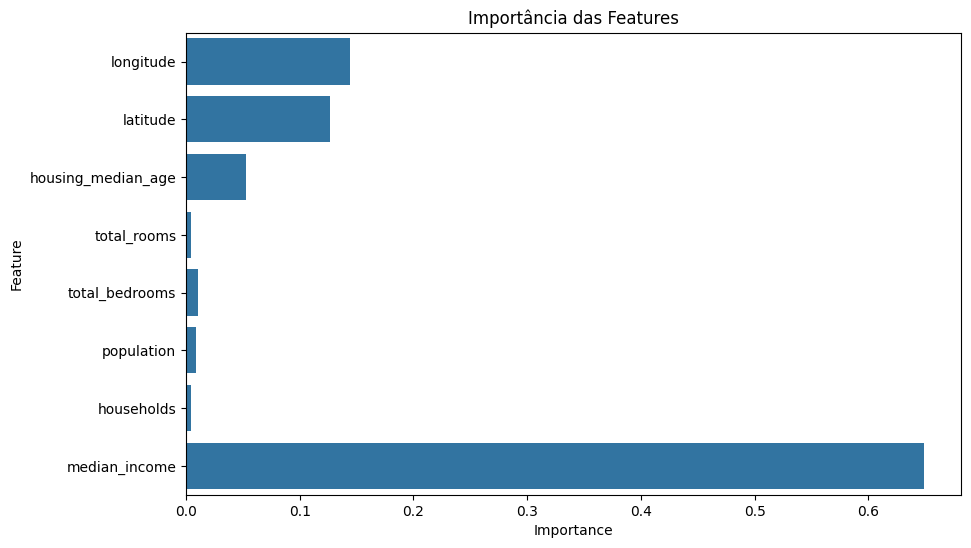

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo Random Forest para regressão
model = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=15,
                              min_samples_leaf=10, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()
